In [47]:
import sys
assert sys.version_info >= (3, 5)

In [48]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [49]:
import numpy as np
import os

In [50]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [51]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
print(IMAGES_PATH)
os.makedirs(IMAGES_PATH, exist_ok=True)

./images/end_to_end_project


In [52]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the Data

## Download the Data

In [53]:
import os
import tarfile
import urllib.request

In [54]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [55]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path) # Décompresser -> extractall
    housing_tgz.close() # C'est bien de le fermer avec "nom_variable.close"

In [56]:
fetch_housing_data()

In [57]:
import pandas as pd

In [58]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## Take a Quick Look at the Data Structure

In [59]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [60]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [61]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [62]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


/home/administrateur/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


Saving figure attribute_histogram_plots


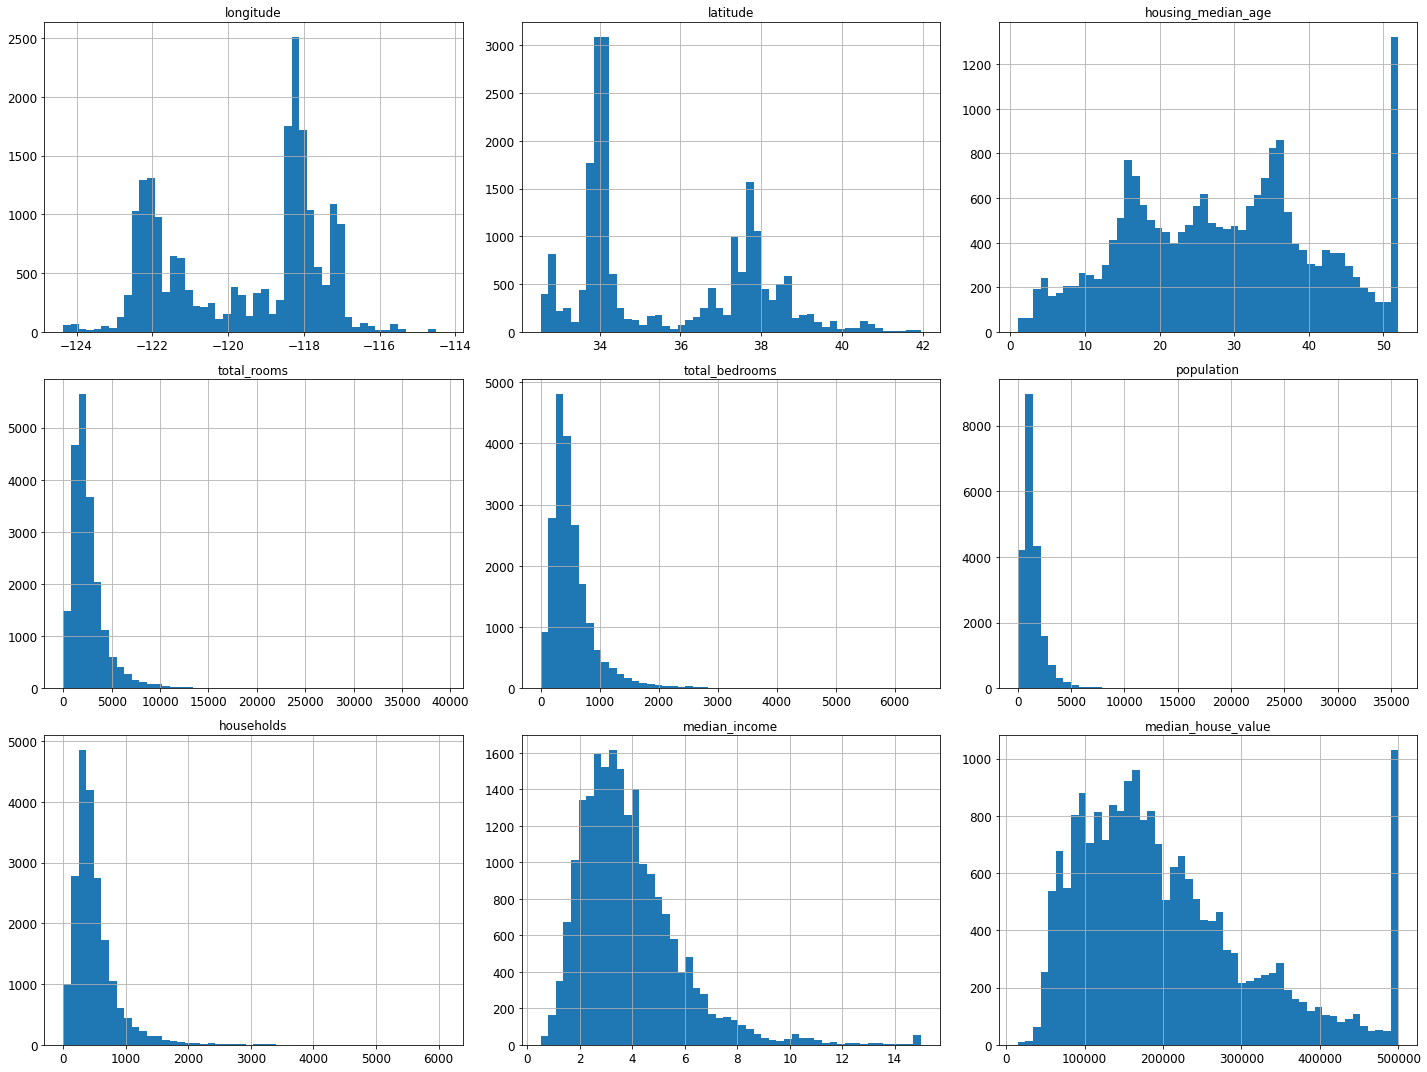

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
save_fig("attribute_histogram_plots")
plt.show()

## Create a Test Set

In [64]:
# to make this notebook's output identical at every
np.random.seed(42)

In [65]:
import numpy as np

In [66]:
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # Il permute, il créer une liste de 0 à len(housing), puis il permute
    test_set_size = int(len(data) * test_ratio) # Calcule le pourcentage
    test_indices = shuffled_indices[:test_set_size] # Sélection de 20% des indices
    train_indices = shuffled_indices[test_set_size:] # Séléction de 80% des indices
    return data.iloc[train_indices], data.iloc[test_indices] # Découper les données particulières

In [67]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [68]:
len(test_set)

4128

In [69]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=0)

In [70]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14740,-117.05,32.58,22.0,2101.0,399.0,1551.0,371.0,4.1518,136900.0,NEAR OCEAN
10101,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,5.7796,241300.0,<1H OCEAN
20566,-121.84,38.65,29.0,3167.0,548.0,1554.0,534.0,4.3487,200700.0,INLAND
2670,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,2.4511,72500.0,INLAND
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049,460000.0,NEAR BAY


In [71]:
housing["income_cat"] = pd.cut(housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

In [72]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [73]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<AxesSubplot:>

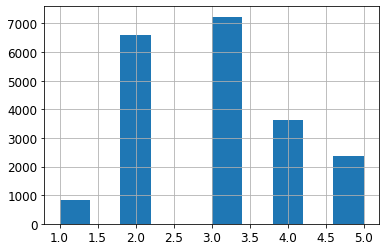

In [74]:
housing["income_cat"].hist()

# Discover and Visualize the Data to Gain Insights

In [75]:
housing = train_set.copy()

## Visualizing Geographical Data

Saving figure bad_visualization_plot


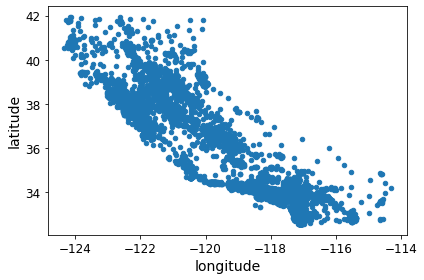

In [76]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


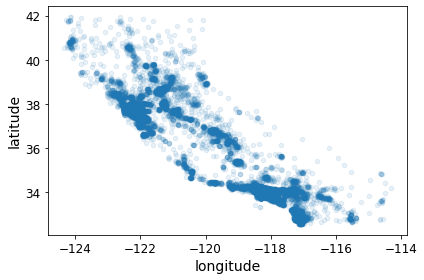

In [77]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

/home/administrateur/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


Saving figure housing_prices_scatterplot


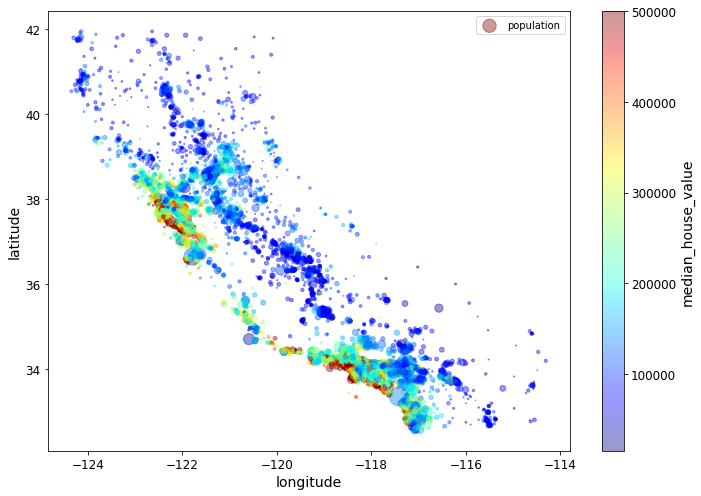

In [78]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [79]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7f7eafc1d670>)

Saving figure california_housing_prices_plot


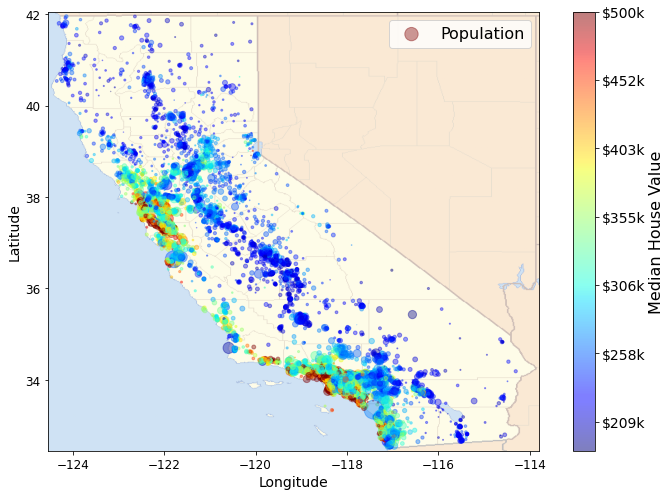

In [80]:
import matplotlib.image as mpimg
california_img = mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 7),
                  s=housing["population"]/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values / prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

## Looking for Corellations

In [81]:
corr_matrix = housing.corr()

In [82]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924889,-0.113274,0.054460,0.079027,0.105128,0.062973,-0.015081,-0.047277
latitude,-0.924889,1.000000,0.016348,-0.046149,-0.075894,-0.114819,-0.078693,-0.081245,-0.142702
housing_median_age,-0.113274,0.016348,1.000000,-0.365816,-0.326871,-0.298908,-0.309804,-0.115757,0.106470
total_rooms,0.054460,-0.046149,-0.365816,1.000000,0.931974,0.855653,0.919641,0.197831,0.133016
total_bedrooms,0.079027,-0.075894,-0.326871,0.931974,1.000000,0.876545,0.978849,-0.006074,0.045394
population,0.105128,-0.114819,-0.298908,0.855653,0.876545,1.000000,0.907018,0.004533,-0.027053
households,0.062973,-0.078693,-0.309804,0.919641,0.978849,0.907018,1.000000,0.014567,0.062294
median_income,-0.015081,-0.081245,-0.115757,0.197831,-0.006074,0.004533,0.014567,1.000000,0.692758
median_house_value,-0.047277,-0.142702,0.106470,0.133016,0.045394,-0.027053,0.062294,0.692758,1.000000


In [83]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.692758
total_rooms           0.133016
housing_median_age    0.106470
households            0.062294
total_bedrooms        0.045394
population           -0.027053
longitude            -0.047277
latitude             -0.142702
Name: median_house_value, dtype: float64

/home/administrateur/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


Saving figure scatter_matrix_plot


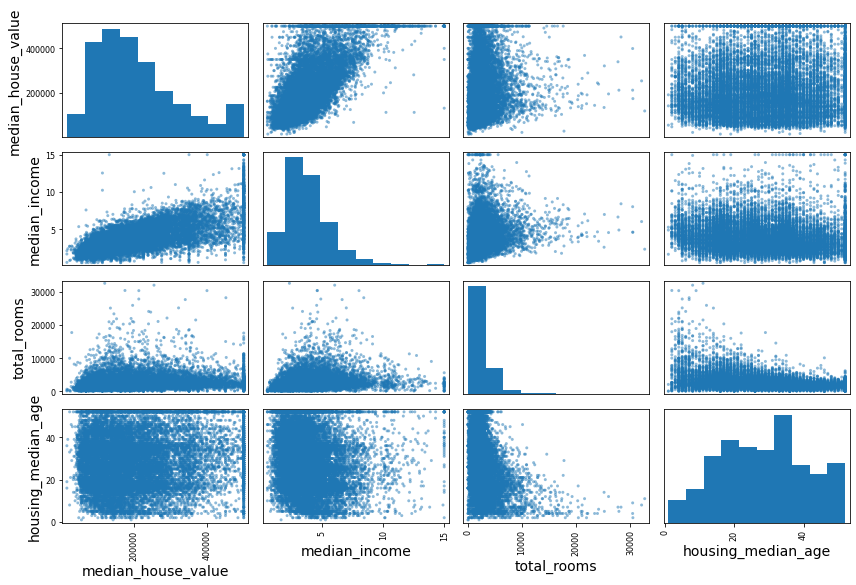

In [84]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


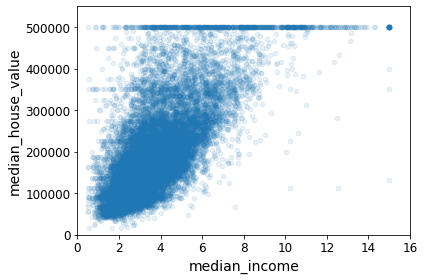

In [85]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

In [86]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [87]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.692758
rooms_per_household         0.154426
total_rooms                 0.133016
housing_median_age          0.106470
households                  0.062294
total_bedrooms              0.045394
population                 -0.027053
population_per_household   -0.033169
longitude                  -0.047277
latitude                   -0.142702
bedrooms_per_room          -0.264585
Name: median_house_value, dtype: float64

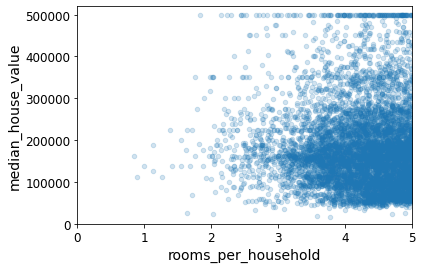

In [88]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [89]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.563008,35.624783,28.619065,2640.140322,537.639110,1425.437742,499.353319,3.876298,207249.895894,5.432607,0.212795,3.030518
std,2.005251,2.136552,12.600999,2186.893548,422.335242,1143.062756,382.482829,1.906783,115691.510483,2.523415,0.057948,6.441340
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.750000
25%,-121.800000,33.930000,18.000000,1448.000000,294.000000,785.000000,279.000000,2.566625,120000.000000,4.447644,0.175322,2.428016
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1166.000000,409.500000,3.548500,180250.000000,5.234243,0.202899,2.817937
75%,-118.000000,37.710000,37.000000,3149.000000,647.000000,1724.000000,605.000000,4.747575,264700.000000,6.059008,0.239400,3.283243
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,599.714286


## Data Cleaning

In [90]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
13933,-117.31,34.25,29.0,4610.0,NaN,1569.0,592.0,2.7663,97900.0,INLAND,7.787162,NaN,2.650338
7668,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,157500.0,<1H OCEAN,4.962825,NaN,3.758364
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,85000.0,NEAR BAY,4.707668,NaN,1.317891
2826,-119.11,35.42,52.0,154.0,NaN,37.0,16.0,10.0263,200000.0,INLAND,9.625000,NaN,2.312500
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN,6.367713,NaN,2.542601


In [91]:
housing.dropna(subset=["total_bedrooms"])
# option 1
housing.drop("total_bedrooms", axis=1)
# option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

In [92]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [93]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [94]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [95]:
imputer.statistics_

array([-1.18490000e+02,  3.42500000e+01,  2.90000000e+01,  2.12700000e+03,
        4.34000000e+02,  1.16600000e+03,  4.09500000e+02,  3.54850000e+00,
        1.80250000e+05,  5.23424323e+00,  2.02898551e-01,  2.81793691e+00])

In [96]:
X = imputer.transform(housing_num)

In [97]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
index=housing_num.index)

In [98]:
housing_cat = housing[["ocean_proximity"]]

In [99]:
from sklearn.preprocessing import OrdinalEncoder

In [100]:
ordinal_encoder = OrdinalEncoder()

In [101]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [102]:
housing_cat_encoded[:10]

array([[1.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [1.],
       [1.]])

In [103]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [104]:
from sklearn.preprocessing import OneHotEncoder

In [105]:
cat_encoder = OneHotEncoder()

In [106]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [107]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [108]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [110]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # ni *args ni **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # rien d’autre à faire
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [119]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12069,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,4.2386,500001.0,INLAND,7.723077,0.151394,3.507692
15925,-122.44,37.73,52.0,2381.0,492.0,1485.0,447.0,4.3898,270000.0,NEAR BAY,5.326622,0.206636,3.322148
11162,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333,196100.0,<1H OCEAN,4.668478,0.224098,2.777174
4904,-118.26,34.01,38.0,697.0,208.0,749.0,206.0,1.4653,118800.0,<1H OCEAN,3.383495,0.298422,3.635922
4683,-118.36,34.08,52.0,2373.0,601.0,1135.0,576.0,3.1765,225000.0,<1H OCEAN,4.119792,0.253266,1.970486


In [115]:
housing['total_rooms'] / housing['households']

12069    7.723077
15925    5.326622
11162    4.668478
4904     3.383495
4683     4.119792
           ...   
13123    6.000000
19648    5.349282
9845     3.641221
10799    4.540598
2732     3.929530
Length: 16512, dtype: float64

In [120]:
housing['population'] / housing['households']

12069    3.507692
15925    3.322148
11162    2.777174
4904     3.635922
4683     1.970486
           ...   
13123    3.251142
19648    3.095694
9845     1.791349
10799    2.247863
2732     3.436242
Length: 16512, dtype: float64

In [121]:
moyenne_pop = housing['population'].mean()

In [122]:
std_pop = housing['population'].std() # std c'est écrat_type

In [124]:
print(moyenne_pop, std_pop)

1425.437742248062 1143.062756115167


In [125]:
(housing['population'] - moyenne_pop) / std_pop

12069   -1.047570
15925    0.052108
11162   -0.352945
4904    -0.591777
4683    -0.254087
           ...   
13123   -0.624146
19648   -0.681011
9845    -0.631144
10799   -0.326699
2732    -0.351195
Name: population, Length: 16512, dtype: float64